In [ ]:
"""Supp Fig 17: Ablation Study and Supp Fig 19: Variation across different seeds"""

In [ ]:
# import libraries

import glob, os
from PIL import Image
import matplotlib.pyplot as plt

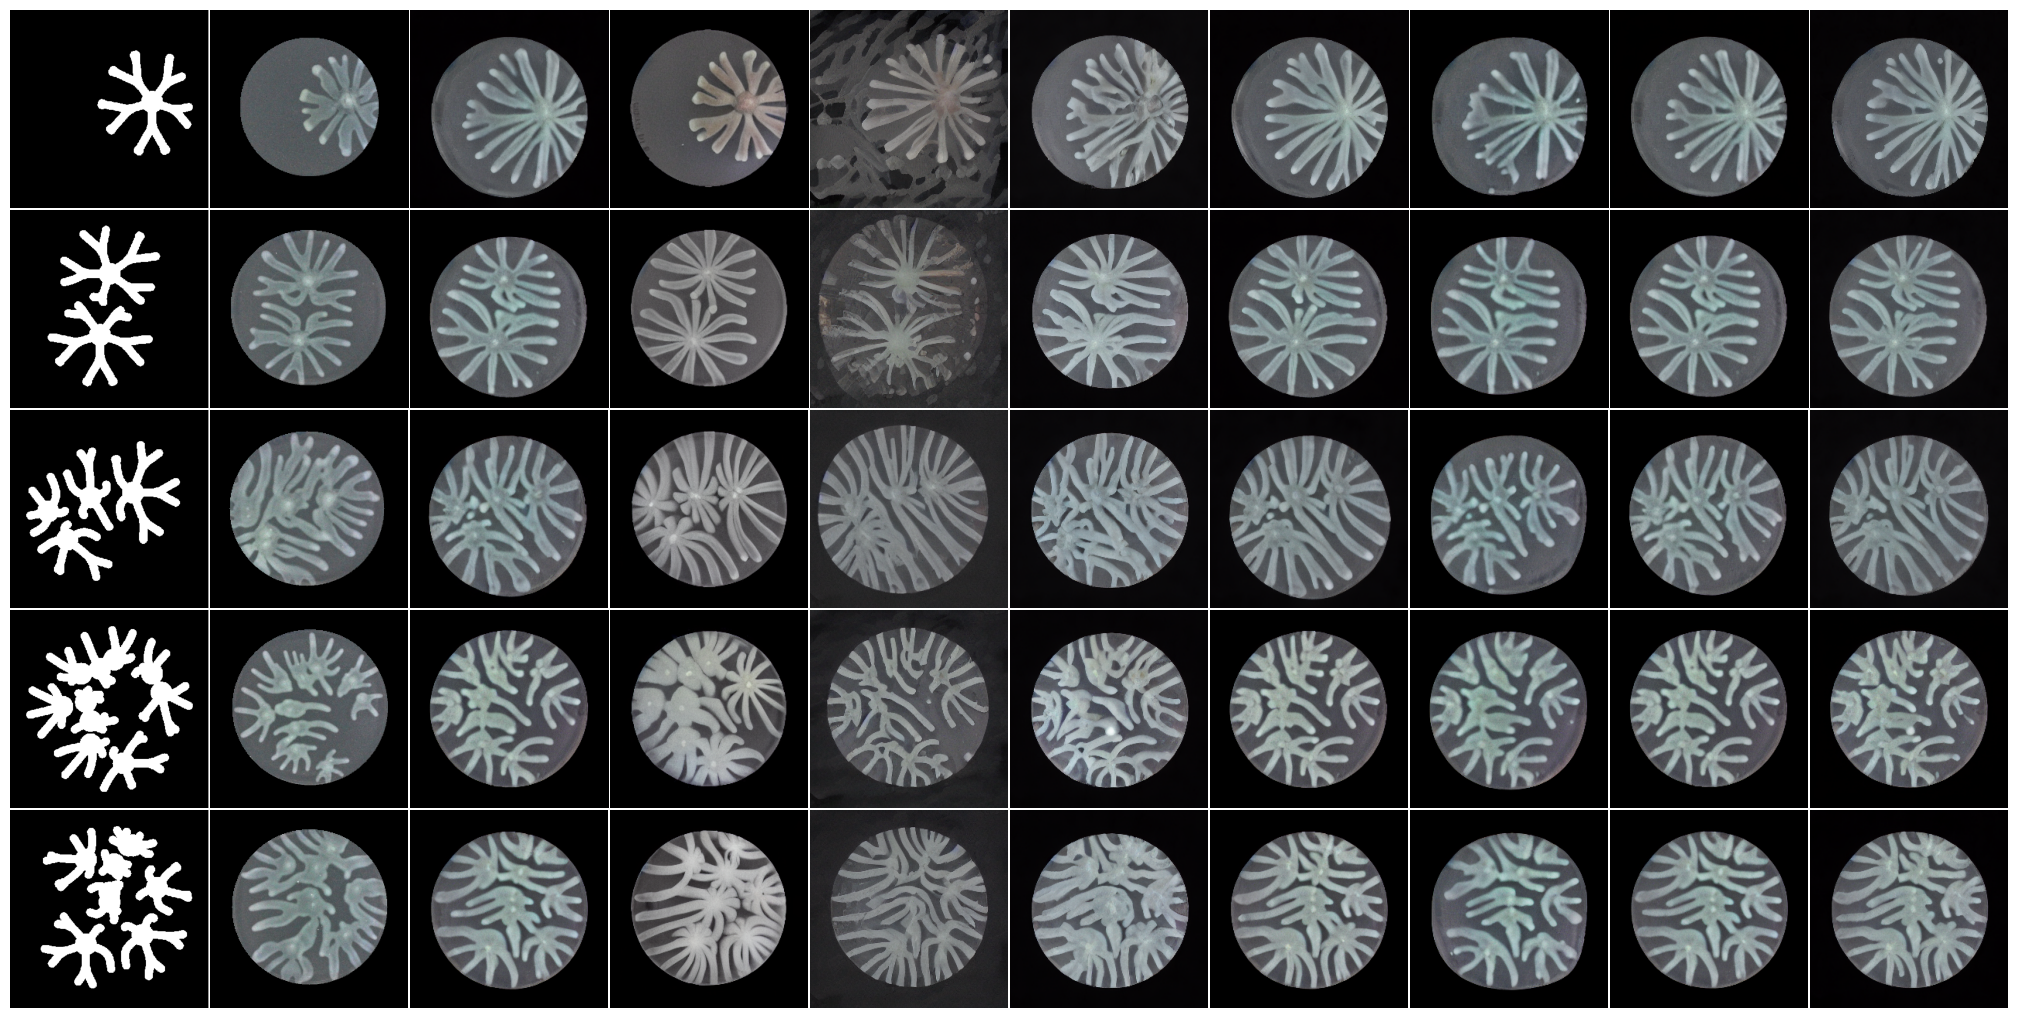

In [ ]:
"""Plot from inference folders saved from the inference of trained ControlNet model on test set
for ablation study- testing different hyperparameters in inference mode"""

# CONFIG
sample_ids = [198, 196, 200,227,245]     # your condition IDs
# define your 7 folders (sim, exp, main, then 4 ablations)
folders = {
    "sim":  "/hpc/group/youlab/ks723/storage/MATLAB_SIMS/Sim_031524/Final_Test_set/",
    "exp":  "/hpc/group/youlab/ks723/storage/Exp_images/Final_Test_set_preprocess/", 
    "main": '/hpc/dctrl/ks723/inference/v2025513_163_simtoexp/',
    'ab1':  '/hpc/dctrl/ks723/inference/v2025515_01_no_guess/',  # Guess_mode= TRUE
    'ab2':  '/hpc/dctrl/ks723/inference/v2025514_1857_no_negative', # n_prompt=""
    'ab3':  '/hpc/dctrl/ks723/inference/v2025514_1859_add_positive', # a_prompt="best quality, extremely detailed" # default ControlNet 
    'ab4':  '/hpc/dctrl/ks723/inference/v2025514_1921_lower_control', # strength=0.85
    'ab5':  '/hpc/dctrl/ks723/inference/v2025514_1921_higher_control', # strength=1.25
    'ab6':  '/hpc/dctrl/ks723/inference/v2025514_1920_higher_ddim' , # ddim_steps=100
    'ab7':  '/hpc/dctrl/ks723/inference/v2025514_190_low_guidance'  # guidance_scale=9.0 # default ControlNet


}
order = ['sim','exp','main','ab1','ab2','ab3','ab4','ab5','ab6','ab7']

# PLOT
ncols = len(order)
fig, axes = plt.subplots(
    len(sample_ids), ncols,
    figsize=(ncols*2, len(sample_ids)*2),
    layout='constrained'
)

for i, sid in enumerate(sample_ids):
    for j, key in enumerate(order):
        folder = folders[key]
        # grab the first replicate (_1) regardless of extension
        pattern = os.path.join(folder, f"{sid}_1*")
        matches = sorted(glob.glob(pattern))
        if not matches:
            raise FileNotFoundError(f"No file for {sid} in {key}")
        img = Image.open(matches[0])
        axes[i, j].imshow(img); axes[i, j].axis('off')
        # if i == 0:
            # axes[i, j].set_title(key.capitalize())

fig.get_layout_engine().set(w_pad=0.01, h_pad=0.01, hspace=0.01,
                            wspace=0.01)
plt.show()


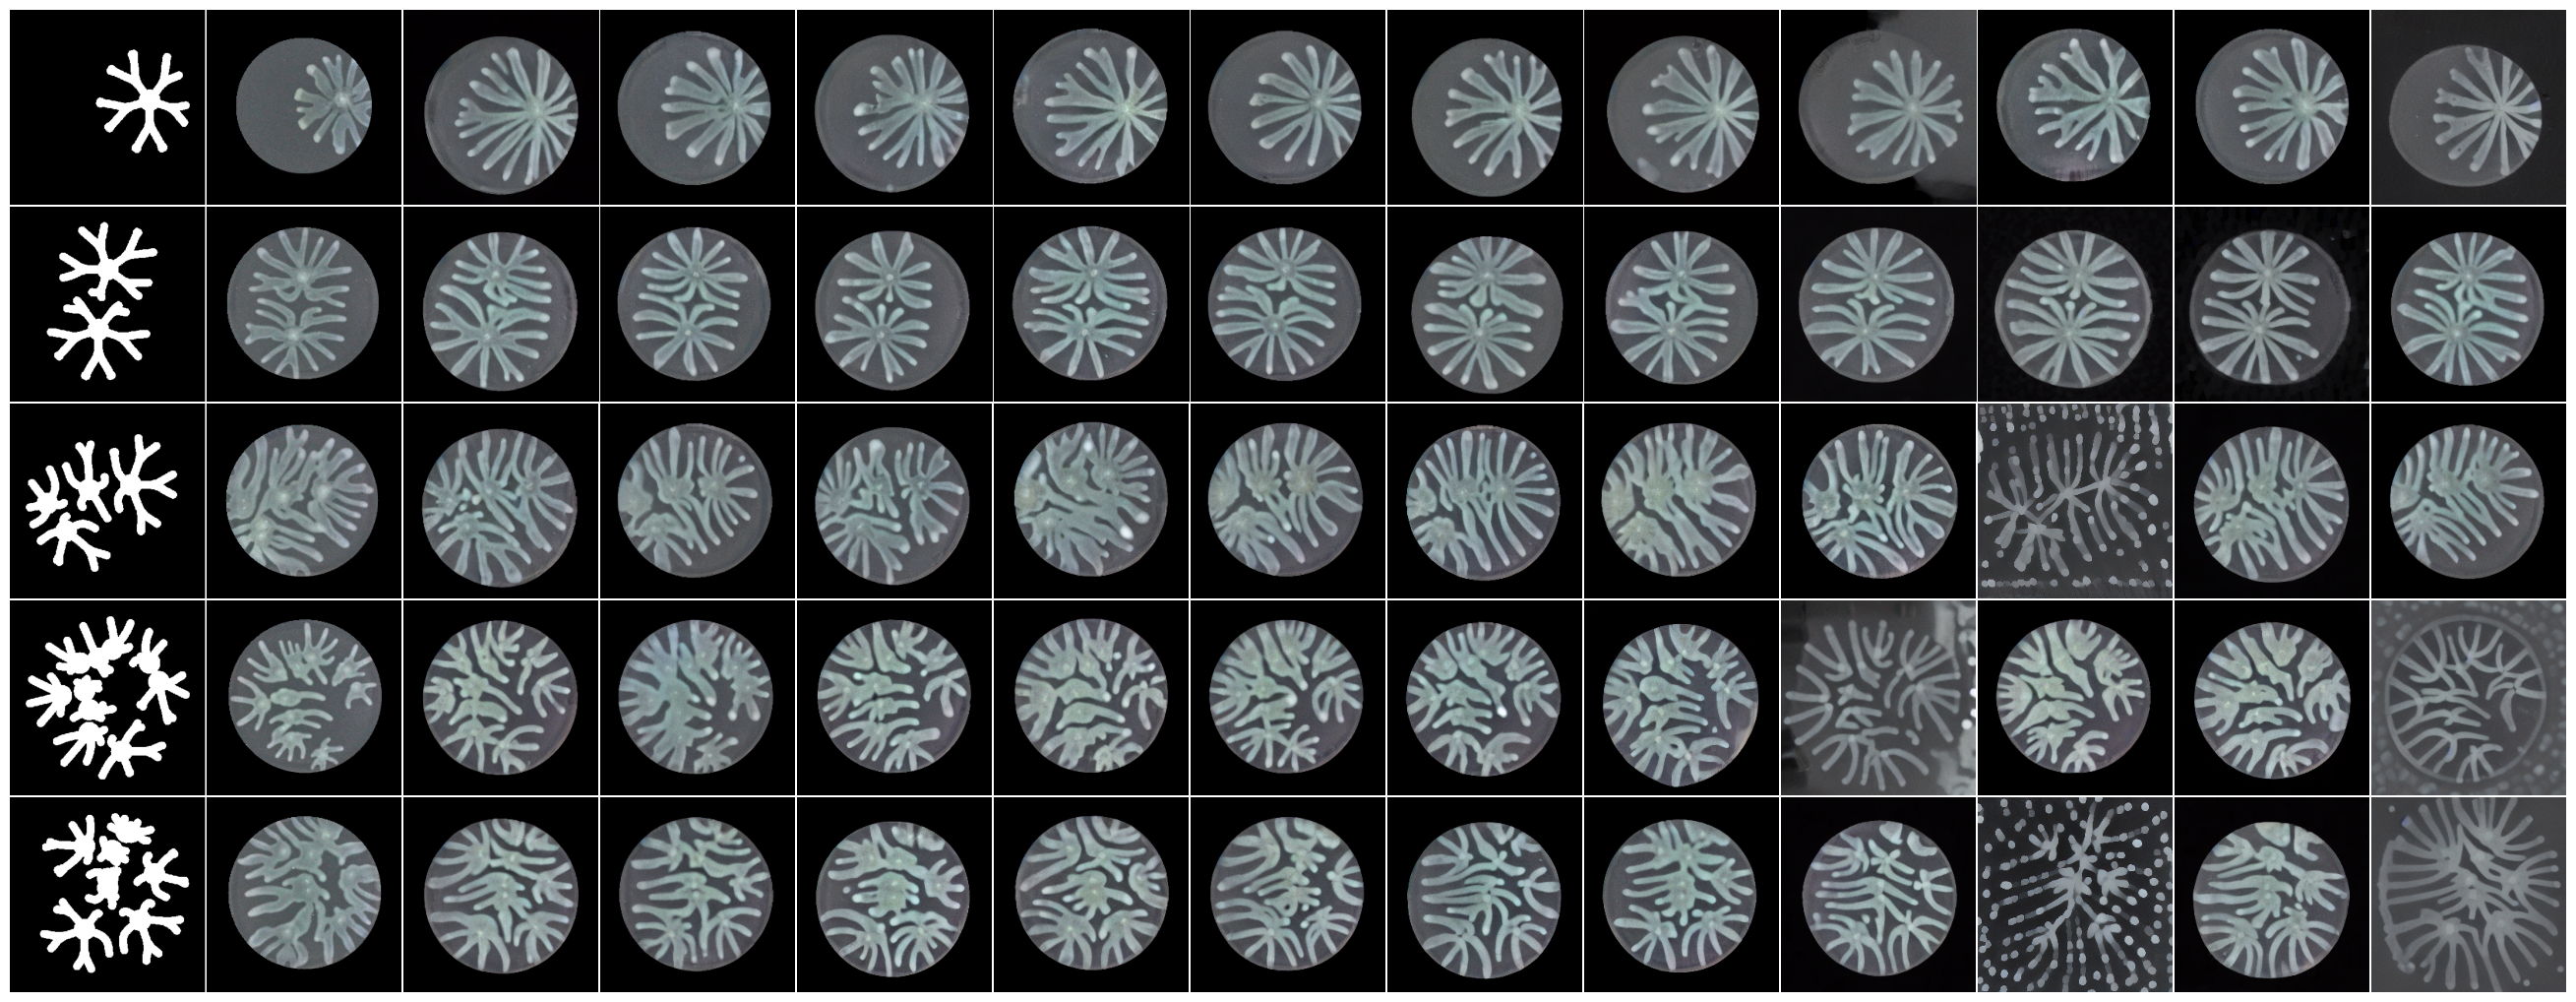

In [ ]:
"""Plot from inference folders saved from the inference of trained ControlNet model on test set
testing the inference model perfromance on different random seeds"""

# CONFIG
sample_ids = [198, 196, 200,227,245]     # your condition IDs
# define your 7 folders (sim, exp, main, then 4 ablations)
folders = {
    "sim":  "/hpc/group/youlab/ks723/storage/MATLAB_SIMS/Sim_031524/Final_Test_set/",
    "exp":  "/hpc/group/youlab/ks723/storage/Exp_images/Final_Test_set_preprocess/", 
    "main": '/hpc/dctrl/ks723/inference/v2025513_163_simtoexp/',
    # good seeds
    'ab1':  '/hpc/dctrl/ks723/inference/v2025515_245_seed_788064616/',  
    'ab2':  '/hpc/dctrl/ks723/inference/v2025515_240_seed_1695058691', 
    'ab3':  '/hpc/dctrl/ks723/inference/v2025515_236_seed_822290414', 
    'ab4':  '/hpc/dctrl/ks723/inference/v2025515_27_seed_802350404', 
    'ab5':  '/hpc/dctrl/ks723/inference/v2025515_27_seed_729397011', 
    # random seeds
    'ab6':  '/hpc/dctrl/ks723/inference/v2025514_1930_random_seed_1' , 
    'ab7':  '/hpc/dctrl/ks723/inference/v2025514_1930_random_seed_2' , 
    'ab8':  '/hpc/dctrl/ks723/inference/v2025515_01_random_seed_3' ,
    'ab9':  '/hpc/dctrl/ks723/inference/v2025515_01_random_seed_4' ,
    'ab10': '/hpc/dctrl/ks723/inference/v2025515_01_random_seed_5' 


}
order = ['sim','exp','main','ab1','ab2','ab3','ab4','ab5','ab6','ab7','ab8','ab9','ab10']

# PLOT
ncols = len(order)
fig, axes = plt.subplots(
    len(sample_ids), ncols,
    figsize=(ncols*2, len(sample_ids)*2),
    layout='constrained'
)

for i, sid in enumerate(sample_ids):
    for j, key in enumerate(order):
        folder = folders[key]
        # grab the first replicate (_1) regardless of extension
        pattern = os.path.join(folder, f"{sid}_1*")
        matches = sorted(glob.glob(pattern))
        if not matches:
            raise FileNotFoundError(f"No file for {sid} in {key}")
        img = Image.open(matches[0])
        axes[i, j].imshow(img); axes[i, j].axis('off')
        # if i == 0:
            # axes[i, j].set_title(key.capitalize())

fig.get_layout_engine().set(w_pad=0.01, h_pad=0.01, hspace=0.01,
                            wspace=0.01)
plt.show()
